In [ ]:
#Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
df=pd.read_csv('Company_Data.csv')

In [ ]:
df.head()

Sales  CompPrice  Income  Advertising  ...  Age  Education Urban   US
0   9.50        138      73           11  ...   42         17   Yes  Yes
1  11.22        111      48           16  ...   65         10   Yes  Yes
2  10.06        113      35           10  ...   59         12   Yes  Yes
3   7.40        117     100            4  ...   55         14   Yes  Yes
4   4.15        141      64            3  ...   38         13   Yes   No

[5 rows x 11 columns]

## EDA

In [ ]:
sales= ["[{0}] - [{1}]".format(Sales,Sales+ 1.0) for Sales in range(2,15,1)]
sales

['[2] - [3.0]',
 '[3] - [4.0]',
 '[4] - [5.0]',
 '[5] - [6.0]',
 '[6] - [7.0]',
 '[7] - [8.0]',
 '[8] - [9.0]',
 '[9] - [10.0]',
 '[10] - [11.0]',
 '[11] - [12.0]',
 '[12] - [13.0]',
 '[13] - [14.0]',
 '[14] - [15.0]']

In [ ]:
count_sales=len(sales)
count_sales

13

In [ ]:
df['Sale']= pd.cut(x=df['Sales'],bins=count_sales, labels= sales)
df['Sale']

0       [9] - [10.0]
1      [10] - [11.0]
2      [10] - [11.0]
3        [7] - [8.0]
4        [5] - [6.0]
           ...      
395    [12] - [13.0]
396      [6] - [7.0]
397      [7] - [8.0]
398      [6] - [7.0]
399     [9] - [10.0]
Name: Sale, Length: 400, dtype: category
Categories (13, object): ['[2] - [3.0]' < '[3] - [4.0]' < '[4] - [5.0]' < '[5] - [6.0]' < ... <
                          '[11] - [12.0]' < '[12] - [13.0]' < '[13] - [14.0]' < '[14] - [15.0]']

In [ ]:
df.head()

Sales  CompPrice  Income  Advertising  ...  Education  Urban   US           Sale
0   9.50        138      73           11  ...         17    Yes  Yes   [9] - [10.0]
1  11.22        111      48           16  ...         10    Yes  Yes  [10] - [11.0]
2  10.06        113      35           10  ...         12    Yes  Yes  [10] - [11.0]
3   7.40        117     100            4  ...         14    Yes  Yes    [7] - [8.0]
4   4.15        141      64            3  ...         13    Yes   No    [5] - [6.0]

[5 rows x 12 columns]

In [ ]:
df1=df['Sale'].value_counts()

In [ ]:
df2=df.drop('Sales',axis=1)
df2.head()

CompPrice  Income  Advertising  ...  Urban   US           Sale
0        138      73           11  ...    Yes  Yes   [9] - [10.0]
1        111      48           16  ...    Yes  Yes  [10] - [11.0]
2        113      35           10  ...    Yes  Yes  [10] - [11.0]
3        117     100            4  ...    Yes  Yes    [7] - [8.0]
4        141      64            3  ...    Yes   No    [5] - [6.0]

[5 rows x 11 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


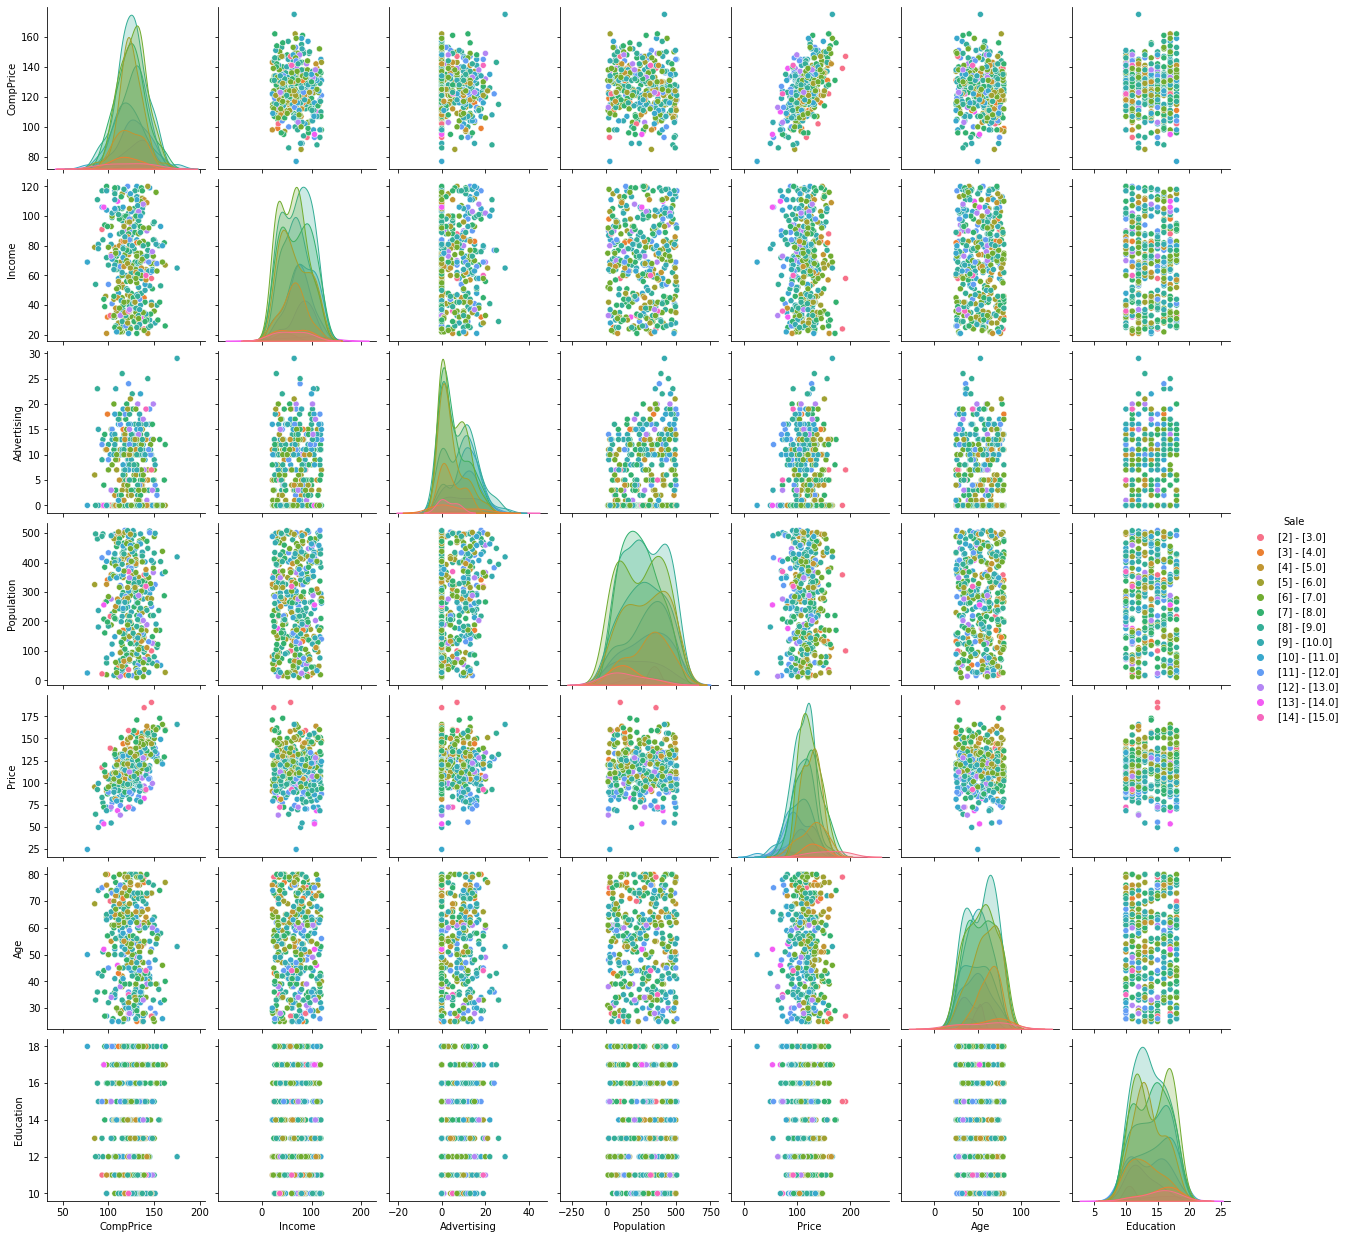

In [ ]:
import seaborn as sns
sns.pairplot(df2,hue='Sale')

In [ ]:
y=df2.iloc[:,-1]
x=df2.iloc[:,:10]

In [ ]:
x

CompPrice  Income  Advertising  Population  ...  Age Education  Urban   US
0          138      73           11         276  ...   42        17    Yes  Yes
1          111      48           16         260  ...   65        10    Yes  Yes
2          113      35           10         269  ...   59        12    Yes  Yes
3          117     100            4         466  ...   55        14    Yes  Yes
4          141      64            3         340  ...   38        13    Yes   No
..         ...     ...          ...         ...  ...  ...       ...    ...  ...
395        138     108           17         203  ...   33        14    Yes  Yes
396        139      23            3          37  ...   55        11     No  Yes
397        162      26           12         368  ...   40        18    Yes  Yes
398        100      79            7         284  ...   50        12    Yes  Yes
399        134      37            0          27  ...   49        16    Yes  Yes

[400 rows x 10 columns]

In [ ]:
y

0       [9] - [10.0]
1      [10] - [11.0]
2      [10] - [11.0]
3        [7] - [8.0]
4        [5] - [6.0]
           ...      
395    [12] - [13.0]
396      [6] - [7.0]
397      [7] - [8.0]
398      [6] - [7.0]
399     [9] - [10.0]
Name: Sale, Length: 400, dtype: category
Categories (13, object): ['[2] - [3.0]' < '[3] - [4.0]' < '[4] - [5.0]' < '[5] - [6.0]' < ... <
                          '[11] - [12.0]' < '[12] - [13.0]' < '[13] - [14.0]' < '[14] - [15.0]']

In [ ]:
df2.dtypes

CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc        object
Age               int64
Education         int64
Urban            object
US               object
Sale           category
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_X= LabelEncoder()
X=x.apply(LabelEncoder().fit_transform)

In [ ]:
X

CompPrice  Income  Advertising  Population  ...  Age  Education  Urban  US
0           49      51           11         141  ...   17          7      1   1
1           22      27           16         129  ...   40          0      1   1
2           24      14           10         138  ...   34          2      1   1
3           28      77            4         249  ...   30          4      1   1
4           52      42            3         178  ...   13          3      1   0
..         ...     ...          ...         ...  ...  ...        ...    ...  ..
395         49      85           17         104  ...    8          4      1   1
396         50       2            3          17  ...   30          1      0   1
397         71       5           12         195  ...   15          8      1   1
398         12      57            7         145  ...   25          2      1   1
399         45      16            0          12  ...   24          6      1   1

[400 rows x 10 columns]

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=40)

### Decision Tree Classifier (C5.0)

In [ ]:
 #Decision Tree Classifier (C5.0)
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

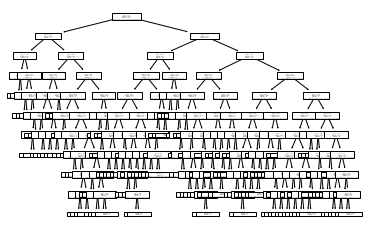

In [ ]:
#PLot the decision tree
tree.plot_tree(model);


In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df2.columns[1:])
features

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sale']

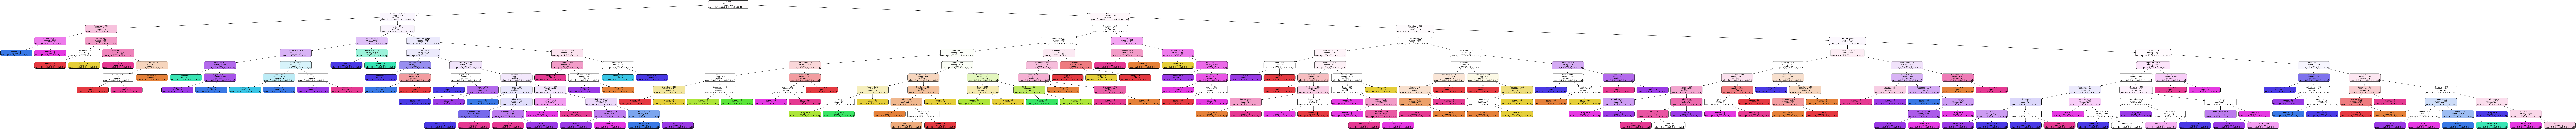

In [ ]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() 

[8] - [9.0]      18
[5] - [6.0]      13
[7] - [8.0]      12
[6] - [7.0]      12
[10] - [11.0]     8
[9] - [10.0]      8
[11] - [12.0]     3
[12] - [13.0]     2
[4] - [5.0]       1
[3] - [4.0]       1
[14] - [15.0]     1
[13] - [14.0]     1
dtype: int64

In [ ]:
preds

array(['[7] - [8.0]', '[5] - [6.0]', '[8] - [9.0]', '[8] - [9.0]',
       '[7] - [8.0]', '[5] - [6.0]', '[11] - [12.0]', '[9] - [10.0]',
       '[6] - [7.0]', '[10] - [11.0]', '[7] - [8.0]', '[7] - [8.0]',
       '[5] - [6.0]', '[8] - [9.0]', '[11] - [12.0]', '[8] - [9.0]',
       '[6] - [7.0]', '[8] - [9.0]', '[7] - [8.0]', '[6] - [7.0]',
       '[8] - [9.0]', '[11] - [12.0]', '[6] - [7.0]', '[10] - [11.0]',
       '[6] - [7.0]', '[6] - [7.0]', '[10] - [11.0]', '[5] - [6.0]',
       '[12] - [13.0]', '[12] - [13.0]', '[13] - [14.0]', '[9] - [10.0]',
       '[10] - [11.0]', '[8] - [9.0]', '[8] - [9.0]', '[8] - [9.0]',
       '[9] - [10.0]', '[5] - [6.0]', '[4] - [5.0]', '[8] - [9.0]',
       '[8] - [9.0]', '[5] - [6.0]', '[7] - [8.0]', '[8] - [9.0]',
       '[9] - [10.0]', '[8] - [9.0]', '[5] - [6.0]', '[5] - [6.0]',
       '[7] - [8.0]', '[8] - [9.0]', '[5] - [6.0]', '[5] - [6.0]',
       '[10] - [11.0]', '[6] - [7.0]', '[8] - [9.0]', '[10] - [11.0]',
       '[6] - [7.0]', '[7] - [8.0]

In [ ]:
y_test

132    [9] - [10.0]
390     [6] - [7.0]
310    [9] - [10.0]
3       [7] - [8.0]
248     [6] - [7.0]
           ...     
361     [8] - [9.0]
197     [4] - [5.0]
23      [6] - [7.0]
54      [5] - [6.0]
58      [6] - [7.0]
Name: Sale, Length: 80, dtype: category
Categories (13, object): ['[2] - [3.0]' < '[3] - [4.0]' < '[4] - [5.0]' < '[5] - [6.0]' < ... <
                          '[11] - [12.0]' < '[12] - [13.0]' < '[13] - [14.0]' < '[14] - [15.0]']

In [ ]:
pd.crosstab(y_test,preds)

col_0          [10] - [11.0]  [11] - [12.0]  ...  [8] - [9.0]  [9] - [10.0]
Sale                                         ...                           
[2] - [3.0]                0              0  ...            0             0
[3] - [4.0]                0              0  ...            0             0
[4] - [5.0]                0              0  ...            2             0
[5] - [6.0]                0              0  ...            1             0
[6] - [7.0]                0              0  ...            2             1
[7] - [8.0]                1              0  ...            7             2
[8] - [9.0]                1              0  ...            2             3
[9] - [10.0]               2              1  ...            3             1
[10] - [11.0]              1              2  ...            0             1
[11] - [12.0]              2              0  ...            1             0
[12] - [13.0]              1              0  ...            0             0
[13] - [14.0]              0              0  ...            0             0

[12 rows x 12 columns]

In [ ]:
# Accuracy 
np.mean(preds==y_test)

0.175


## Post pruning decision trees with cost complexity pruning¶

In [ ]:
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
ccp_alphas


array([0.        , 0.00625   , 0.00625   , 0.00625   , 0.00625   ,
       0.00625   , 0.00625   , 0.00625   , 0.00625   , 0.00625   ,
       0.00625   , 0.00625   , 0.00625   , 0.00625   , 0.00733911,
       0.00733911, 0.00758555, 0.00860902, 0.00860902, 0.00860902,
       0.00860902, 0.00860902, 0.00860902, 0.00860902, 0.00860902,
       0.00860902, 0.00860902, 0.00860902, 0.00860902, 0.00860902,
       0.00879034, 0.00899325, 0.01014098, 0.01014098, 0.01014098,
       0.01014098, 0.01014098, 0.01014098, 0.01014098, 0.01014098,
       0.01077593, 0.01128013, 0.01128013, 0.01128013, 0.01167293,
       0.01167293, 0.01193043, 0.01218792, 0.01218792, 0.0125    ,
       0.0125    , 0.0125    , 0.0125    , 0.0125    , 0.0125    ,
       0.0125    , 0.01291354, 0.01294284, 0.01358911, 0.01358911,
       0.01358911, 0.01371987, 0.01415414, 0.01415414, 0.01415414,
       0.01415414, 0.01415414, 0.01444549, 0.01465611, 0.01465611,
       0.01485902, 0.0149048 , 0.01510771, 0.0151711 , 0.01517

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17749086537025227


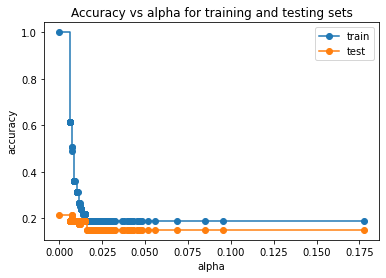

In [ ]:
#Accuracy vs alpha for training and testing sets
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.004)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.004, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.2

[Text(275.93531164461683, 524.1857142857143, 'X[5] <= 0.5\ngini = 0.873\nsamples = 320\nvalue = [27, 21, 11, 2, 2, 4, 5, 14, 34, 56, 44, 60, 40]'),
 Text(83.81455291970804, 485.3571428571429, 'X[4] <= 27.0\ngini = 0.843\nsamples = 83\nvalue = [3, 1, 0, 0, 0, 3, 5, 10, 17, 20, 6, 14, 4]'),
 Text(24.437956204379564, 446.52857142857147, 'X[1] <= 27.5\ngini = 0.734\nsamples = 16\nvalue = [2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 7, 2]'),
 Text(12.218978102189782, 407.70000000000005, 'X[2] <= 7.5\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0]'),
 Text(6.109489051094891, 368.8714285714286, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0]'),
 Text(18.328467153284674, 368.8714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(36.65693430656935, 407.70000000000005, 'X[0] <= 28.0\ngini = 0.597\nsamples = 12\nvalue = [2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2]'),
 Text(30.547445255474454, 368.8714285714286, 'gini

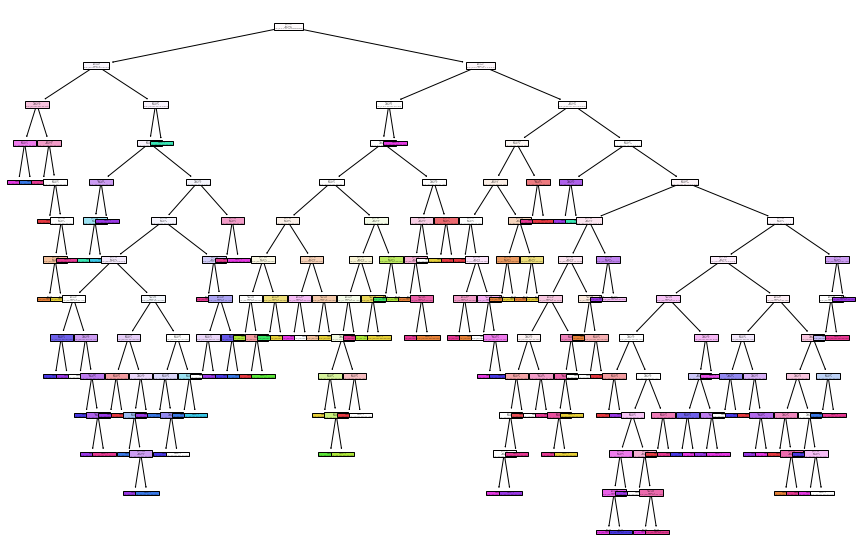

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

### Decision Tree Classifier (CART) 

In [ ]:
 
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

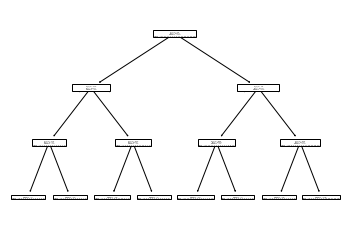

In [ ]:
tree.plot_tree(model_gini);

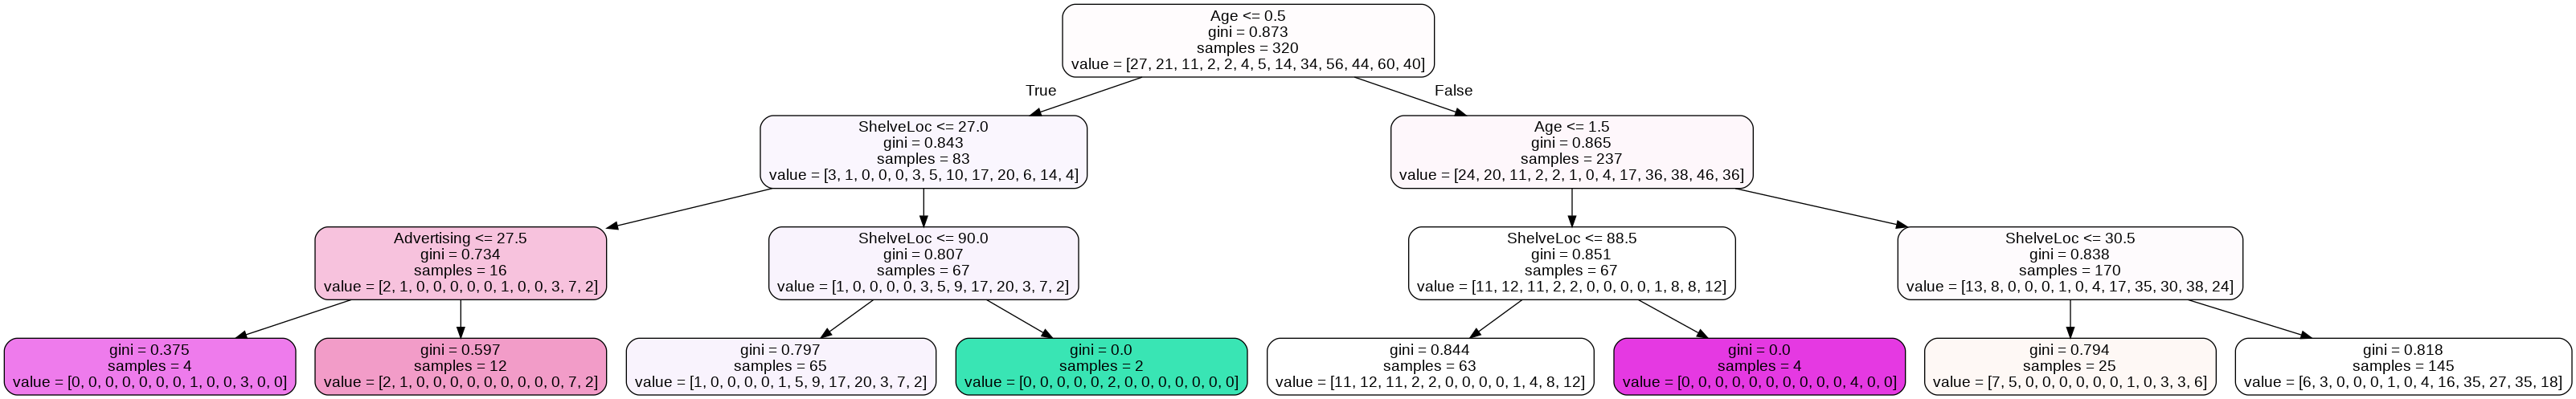

In [ ]:
dot_data = StringIO()  
export_graphviz(model_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.175

## Random Forests

In [ ]:
#let's compare the decision tree model to a random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[2 0 0 0 0 0 0 0 0 0 2 3]
 [2 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 2 2 1 0]
 [0 0 0 0 0 0 0 4 6 2 0 0]
 [0 0 0 0 0 0 0 0 4 2 3 0]
 [1 0 0 0 0 0 0 0 3 4 5 3]
 [3 0 0 0 0 0 0 1 1 3 4 0]
 [3 0 0 0 0 0 0 0 2 0 3 1]]


In [ ]:
print(classification_report(y_test,rfc_pred))

               precision    recall  f1-score   support

[10] - [11.0]       0.17      0.29      0.21         7
[11] - [12.0]       0.00      0.00      0.00         4
[12] - [13.0]       0.00      0.00      0.00         2
[13] - [14.0]       0.00      0.00      0.00         1
  [2] - [3.0]       0.00      0.00      0.00         1
  [3] - [4.0]       0.00      0.00      0.00         1
  [4] - [5.0]       0.00      0.00      0.00         6
  [5] - [6.0]       0.67      0.33      0.44        12
  [6] - [7.0]       0.20      0.44      0.28         9
  [7] - [8.0]       0.29      0.25      0.27        16
  [8] - [9.0]       0.20      0.33      0.25        12
 [9] - [10.0]       0.12      0.11      0.12         9

     accuracy                           0.24        80
    macro avg       0.14      0.15      0.13        80
 weighted avg       0.24      0.24      0.22        80



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
